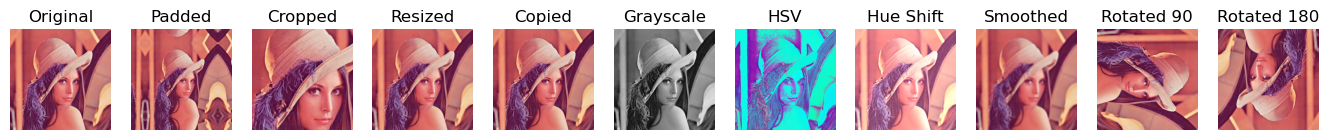

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena-1.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 

# 1. Padding
def padding(image, border_width):
    return cv2.copyMakeBorder(image, border_width, border_width, border_width, border_width, cv2.BORDER_REFLECT)
padded_img = padding(img, 100)

# 2. Cropping
def crop(image, x_0, x_1, y_0, y_1):
    return image[y_0:y_1, x_0:x_1]
height, width = img_rgb.shape[:2]
cropped_img = crop(img, 80, width-130, 80, height-130)

# 3. Resizing
def resize(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)
resized_img = resize(img, 200, 200)
#Copy
def copy(image, emptyPictureArray):
    height, width, channels = image.shape
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                emptyPictureArray[y, x, c] = image[y, x, c]
    return emptyPictureArray
emptyPictureArray = np.zeros(img.shape, dtype=np.uint8)
copied_img = copy(img, emptyPictureArray)
#GrayScale
def grayscale(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_img
gray_img = grayscale(img)
#HSV
def hsv(image):
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv_img
hsv_img = hsv(img)
#Hue_Shifting
def hue_shifted(image, emptyPictureArray, hue):
    shifted = image.astype(np.int16) + hue
    shifted = np.clip(shifted, 0, 255)  # Ensure values are in [0,255]
    emptyPictureArray[:,:,:] = shifted.astype(np.uint8)
    return emptyPictureArray
emptyPictureArray = np.zeros(img.shape, dtype=np.uint8)
shifted_img = hue_shifted(img, emptyPictureArray, 50)
#Smoothing
def smoothing(image):
    blurred_img = cv2.GaussianBlur(image, (15, 15), 0, borderType=cv2.BORDER_DEFAULT)
    return blurred_img
smooth_img = smoothing(img)
#Rotating
def rotation(image, rotation_angle):
    if rotation_angle == 90:
        rotated_img = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    elif rotation_angle == 180:
        rotated_img = cv2.rotate(image, cv2.ROTATE_180)
    else:
        raise ValueError("Only 90 and 180 degree rotations are supported.")
    return rotated_img
rot90_img = rotation(img, 90)
rot180_img = rotation(img, 180)

    
# Display all images side by side

plt.figure(figsize=(20, 10))

plt.subplot(1, 13, 1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 13, 2)
plt.title("Padded")
plt.imshow(cv2.cvtColor(padded_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 13, 3)
plt.title("Cropped")
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 13, 4)
plt.title("Resized")
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 13, 5)
plt.title("Copied")
plt.imshow(cv2.cvtColor(copied_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 13, 6)
plt.title("Grayscale")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 13, 7)
plt.title("HSV")
plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_BGR2HSV))
plt.axis('off')

plt.subplot(1, 13, 8)
plt.title("Hue Shift")
plt.imshow(cv2.cvtColor(shifted_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 13, 9)
plt.title("Smoothed")
plt.imshow(cv2.cvtColor(smooth_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 13, 10)
plt.title("Rotated 90")
plt.imshow(cv2.cvtColor(rot90_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 13, 11)
plt.title("Rotated 180")
plt.imshow(cv2.cvtColor(rot180_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
